Complete the exercises below For **Assignment #4**.

Use **Markdown** cells for the non-code answers.

In this assignment we will work with the data underlying the *FiveThirtyEight* article ["Higher Rates Of Hate Crimes Are Tied To Income Inequality"](https://fivethirtyeight.com/features/higher-rates-of-hate-crimes-are-tied-to-income-inequality/).

Load the `tidymodels`, `readr`, and `moderndive` packages in the cell below.

In [6]:
library('tidymodels')
library('readr')
library('moderndive')
library('broom')


── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ dials        1.2.1      ✔ rsample      1.2.1 
✔ dplyr        1.1.4      ✔ tibble       3.2.1 
✔ ggplot2      3.5.1      ✔ tidyr        1.3.1 
✔ infer        1.0.7      ✔ tune         1.2.1 
✔ modeldata    1.3.0      ✔ workflows    1.1.4 
✔ parsnip      1.2.1      ✔ workflowsets 1.1.0 
✔ purrr        1.0.2      ✔ yardstick    1.3.1 
✔ recipes      1.0.10     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Learn how to get started at https://www.tidymodels.org/start/


Attaching package: ‘readr’


The following object is masked from ‘package:yardstick’:

    spec


The following object is masked from ‘package:scales’:

    col_factor




We can read the data from a **CSV file** at the following URL: [http://bit.ly/2ItxYg3](http://bit.ly/2ItxYg3).

Use the `read_csv` function to read the data into our R session. Call the new table `hate_crimes`.

In [7]:
url <- "http://bit.ly/2ItxYg3"
hate_crimes <- read.csv(url)

glimpse(hate_crimes)


Rows: 51
Columns: 9
$ state            <chr> "New Mexico", "Maine", "New York", "Illinois", "Delaw…
$ median_house_inc <chr> "low", "low", "low", "low", "high", "high", "high", "…
$ share_pop_metro  <dbl> 0.69, 0.54, 0.94, 0.90, 0.90, 1.00, 0.87, 0.86, 0.97,…
$ hs               <int> 83, 90, 85, 86, 87, 85, 89, 90, 81, 91, 89, 89, 87, 8…
$ hate_crimes      <dbl> 0.295, 0.616, 0.351, 0.195, 0.323, 0.095, 0.833, 0.67…
$ trump_support    <chr> "low", "low", "low", "low", "low", "low", "low", "low…
$ unemployment     <chr> "high", "low", "low", "high", "low", "high", "high", …
$ urbanization     <chr> "low", "low", "high", "high", "high", "high", "high",…
$ income           <int> 46686, 51710, 54310, 54916, 57522, 58633, 58875, 5906…


Next, let’s add the high-school degree variable into the mix by creating a scatterplot showing:

- Income on the y-axis (this is the `income` variable)
- Percent of adults 25 or older with a high school degree on the x-axis (this is the `hs` variable)
- The points colored by level of urbanization in a region (this is the variable `urbanization`)


**In addition, add a line of best fit (regression line) for each level of the variable urbanization (one for “low”, one for “high”).**

*Add the regression lines to the plot using the `geom_parallel_slopes` function from the `moderndive` package. This function will draw the regression lines based on fitting a regression model with parallel slopes (i.e., with no interaction between `hs` and `urbanization`).*

Warning message:
“Removed 3 rows containing non-finite outside the scale range
(`stat_parallel_slopes()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”


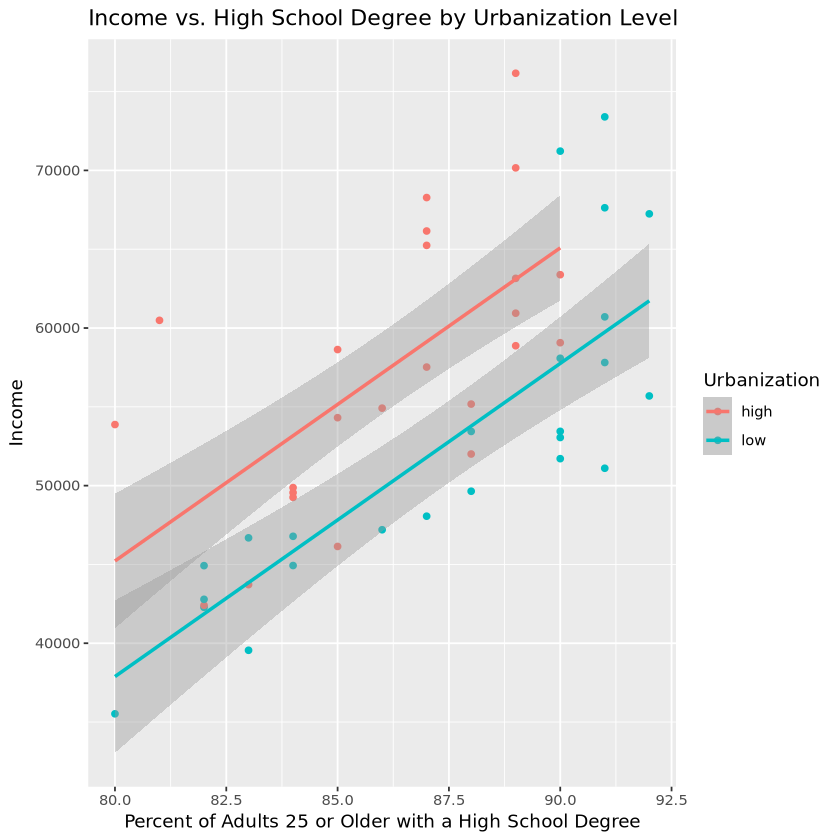

In [8]:
ggplot(hate_crimes, aes(x = hs, y = income, color = urbanization)) +
  geom_point() +
  geom_parallel_slopes(aes(group = urbanization)) +
  labs(
    title = "Income vs. High School Degree by Urbanization Level",
    x = "Percent of Adults 25 or Older with a High School Degree",
    y = "Income",
    color = "Urbanization"
)


❓Which regression line (high urbanization or low urbanization) appears to have the larger intercept?

**Answer:**

In [9]:
model <- lm(income ~ hs + urbanization, data = hate_crimes)

summary(model)


Call:
lm(formula = income ~ hs + urbanization, data = hate_crimes)

Residuals:
   Min     1Q Median     3Q    Max 
 -9108  -4242  -1654   3168  13657 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -113725.2    23552.9  -4.828 1.62e-05 ***
hs                 1986.8      272.9   7.279 3.93e-09 ***
urbanizationlow   -7333.3     1857.7  -3.948 0.000274 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6326 on 45 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.5716,	Adjusted R-squared:  0.5526 
F-statistic: 30.02 on 2 and 45 DF,  p-value: 5.204e-09


The high urbanization regression line has the larger intercept. 

Now let’s create a second scatterplot using the same variables, but this time draw the regression lines using `geom_smooth(method = "lm")`, which will allow for separate, non-parallel slopes for each urbanization group. 

**Code your scatter plot in the cell below.**

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 3 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”


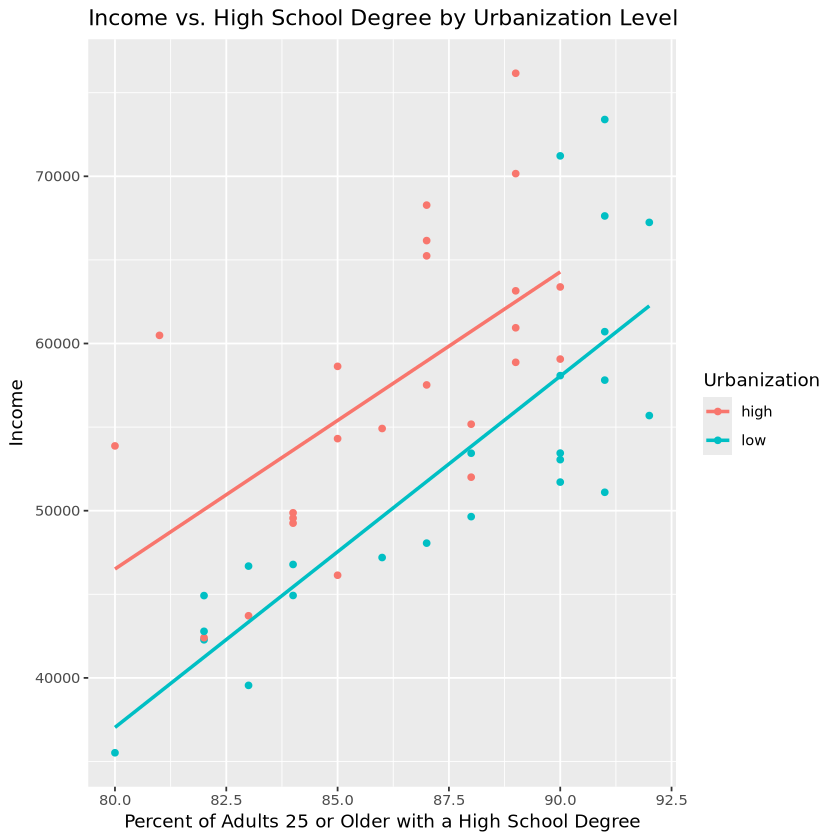

In [10]:
ggplot(hate_crimes, aes(x = hs, y = income, color = urbanization)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  labs(
    title = "Income vs. High School Degree by Urbanization Level",
    x = "Percent of Adults 25 or Older with a High School Degree",
    y = "Income",
    color = "Urbanization"
  )

❓Based on visually comparing the two models shown above, do you think it would be best to run a “parallel slopes” model (i.e. a model that estimates one shared slope for the two levels of urbanization), or a more complex “interaction model” (i.e. a model that estimates a separate slope for the two levels of urbanization)?

**Answer:**

Based on comparing the two models shown above, I think a more complex "interaction model" would best as the slopes have a noticeable difference.



Fit the following two regression models that examine the relationship between household `income` (as response variable), and high-school education (`hs`) and `urbanization` as explanatory variables:

1. A parallel slopes model (i.e., no interaction between `hs` and `urbanization`). ❗️Save the data recipe and model under the variables `ps_rec` and `ps_mod`, respectively. 
1. A non-parallel slopes model (i.e., allow `hs` and `urbanization` to interact in your model). ❗️Save the data recipe and model under the variable: `nps_rec` and `nps_mod`, respectively.

**Code you your models in the cell below.**

In [11]:
# parallel slopes model

ps_rec = recipe(income ~ hs + urbanization, data = hate_crimes) |> 
    step_naomit(everything()) |>   # remove missing values
    step_dummy(urbanization) |>    # dummy encode the urbanization variable
    prep()                         # run the recipe on the training data provided

mod = linear_reg() |> set_engine('lm')

ps_mod = mod |> fit(income ~ ., juice(ps_rec))

ps_mod

parsnip model object


Call:
stats::lm(formula = income ~ ., data = data)

Coefficients:
     (Intercept)                hs  urbanization_low  
         -113725              1987             -7333  


In [12]:
# non-parallel slopes model

# ❗️ you can use most of the code above, just add step_interact(~ starts_with("urbanization"):hs) to the recipe and
#    switch the variable names...
nps_rec <- recipe(income ~ hs + urbanization, data = hate_crimes) |> 
  step_naomit(everything()) |>   
  step_dummy(urbanization) |>    
  step_interact(~ starts_with("urbanization"):hs) |> 
  prep()       

nps_mod <- mod |> fit(income ~ ., data = juice(nps_rec))

nps_mod


parsnip model object


Call:
stats::lm(formula = income ~ ., data = data)

Coefficients:
          (Intercept)                     hs       urbanization_low  
               -95647                   1777                 -35394  
urbanization_low_x_hs  
                  324  


The following code creates a table of your model predictions over the training data. Calculate the [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) (R<sup>2</sup>) for each model:

```r
rbind(
    augment(ps_mod, juice(ps_rec)) |> select(income, .pred, .resid) |> mutate(model = "parallel_slopes"),
    augment(nps_mod, juice(nps_rec)) |> select(income, .pred, .resid) |> mutate(model = "interaction")
)
```

1. Group rows by the `model` variable (use the `group_by` function).
1. Calculate the variance of income over the variance of your predictions for each model using the "grouped" data from the step above (use `summarize(r_squared = var(.pred) / var(income))`).

In [13]:
predictions <- rbind(
  augment(ps_mod, juice(ps_rec)) |> select(income, .pred, .resid) |> mutate(model = "parallel_slopes"),
  augment(nps_mod, juice(nps_rec)) |> select(income, .pred, .resid) |> mutate(model = "interaction")
)

grouped_predictions <- predictions |> group_by(model)

r_squared <- grouped_predictions |> 
  summarize(r_squared = var(.pred) / var(income))

print(r_squared)

# A tibble: 2 × 2
  model           r_squared
  <chr>               <dbl>
1 interaction         0.575
2 parallel_slopes     0.572


🎶 Note: you can also use the `glance` function with a model as input to find the coefficient of determination.

In [14]:
glance(ps_mod)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.5716112,0.5525717,6325.667,30.02238,5.204241e-09,2,-486.6739,981.3479,988.8327,1800633086,45,48


❓Compare the adjusted proportion of variance accounted for in each model. Based on this comparison, which model do you prefer? Why? 

**Answer:**

Compared to the adjusted proportion of variance accounted for in each model I would still prefer an interaction model due to the higher adjusted r^2 value.

❓Using your preferred model, based on your regression model parameters (and the data visualizations), is `income` greater in states that have lower or higher levels of `urbanization`? By how much?

**Hint:** use the `tidy` function with your model as input to access the parameters in a nice table.

**Answer:**

In [15]:
coefficients <- tidy(nps_mod)
print(coefficients)

# A tibble: 4 × 5
  term                  estimate std.error statistic  p.value
  <chr>                    <dbl>     <dbl>     <dbl>    <dbl>
1 (Intercept)            -95647.    39938.    -2.39  0.0209  
2 hs                       1777.      463.     3.84  0.000395
3 urbanization_low       -35394.    49894.    -0.709 0.482   
4 urbanization_low_x_hs     324.      576.     0.563 0.576   


Income is typically greater in states that have more urbaniztion by $35494. <br>
High_Income = -95647 + 177 * hs <br>
Low_Income = -95647 -35394 + (177+324) * hs <br>
Low_Income = -131041 + 2101 * hs <br>
-95647-(-131041) = 35494

❓For every one percentage point increase of high-school educated adults in a state (`hs` variable), what is the associated average increase in `income`?

**Answer:**

For every one percentage point increase of high-school educated adults in a state, the associated average increase in income is 1,777 dollars in higher urbanization level areas and 2,101 dollars in areas of lower urbanization.